# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab as pl
import seaborn as sns
import math
sns.set()
plt.style.use('fivethirtyeight')


df = pd.read_csv('human_body_temperature.csv')

### Inspect Data for any obvious observations

In [10]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## Is the true population mean really 98.6 degrees F?
* It can be observed from the desribe function that the mean or average temperature of our sample population is actually 98.25 degrees F
* This shows that there may be an observable range of normal temperatures 
* We then verify if the mean temperature of the population is correct, which we can see it is
* Generate a random sample to verify if observed sample is independent and representative of the population

In [60]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [134]:
df['gender'].describe()

count     130
unique      2
top         F
freq       65
Name: gender, dtype: object

In [39]:
# Verify sample populaiton mean

population_temperature_mean= temperature.mean()
print (population_temperature_mean)

# Generate random sample to compare with sample

np.random.seed(42)
sample_temperature = np.random.choice(temperature, 500) 
print ((sample_temperature.mean()))

population_temperature_mean - sample_temperature.mean()

98.24923076923078
98.3108


-0.061569230769208616

*  We can see that the difference of means between our random sample and original sample is approx 0.06 which is not significant enough to not consider our sample as inaccurate in terms of representing the population

In [12]:
temperature = df['temperature']

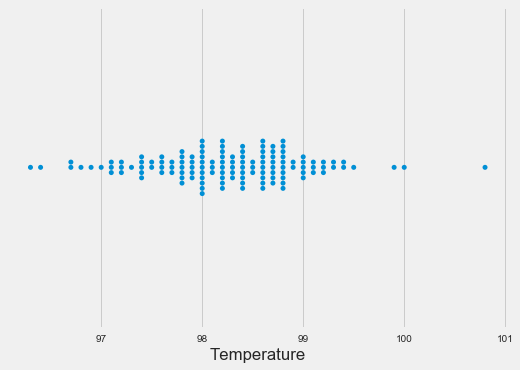

In [15]:
_ = sns.swarmplot(x= temperature, data=df)
_= plt.xlabel('Temperature')
plt.show()

* Swarmplot observations show a good density between 98 and 99 degrees
* There are some observable outliers which should be noted

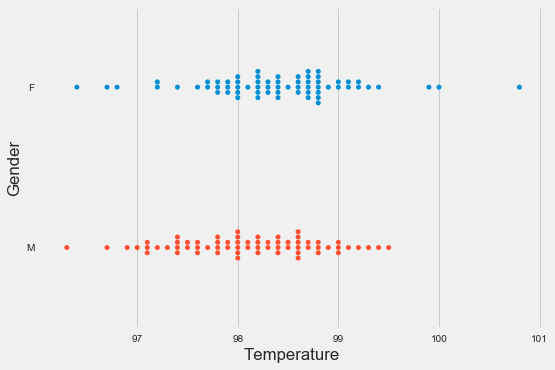

In [18]:
_ = sns.swarmplot(x= temperature, y='gender', data=df)
_= plt.xlabel('Temperature')
_= plt.ylabel('Gender')
plt.show()

* Investigaitng the outliers we can see that there is a difference between gender
* Observing the temperature by gender we can see that males have a slightly lower temperature than the females in the sample 
* The very high temperature observations seem to be from the females and the low outliers are generated by both male and females observations 

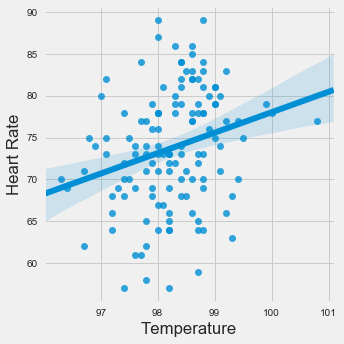

In [22]:
# Linear regression observation against heart rate

_= sns.lmplot(x= 'temperature', y='heart_rate', data=df)
_= plt.xlabel('Temperature')
_= plt.ylabel('Heart Rate')
plt.show()

*  The correlation of temperature to heart rate shows us that there is no uniformity of heart rate and temperature
*  Using the generated correlation line to assign an observation we can see that as heart rate increases temperature rises
*  We can also observe that the heart rate is not an ideal indicator of temperature

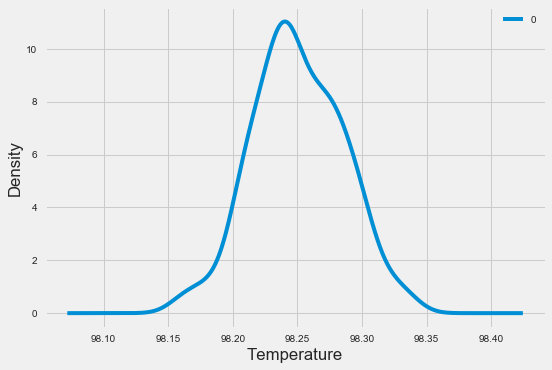

In [52]:
np.random.seed(42)

point_estimates = []         

for x in range(200):         
    sample = np.random.choice(a= temperature, size=500)
    point_estimates.append(sample.mean())
    
_= pd.DataFrame(point_estimates).plot(kind="density") 
_= plt.xlabel('Temperature')
plt.show()

In [24]:
n_data= len(temperature)
n_bins= np.sqrt(n_data)
n_bins= int(n_bins)

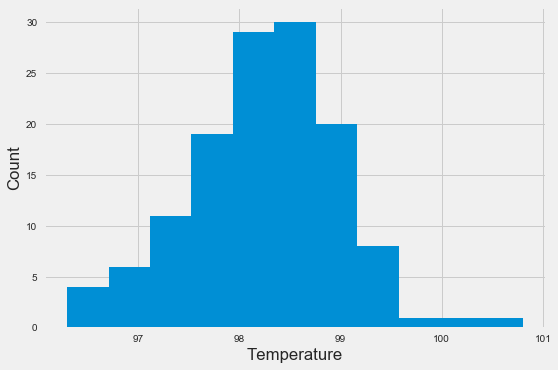

In [56]:
_= plt.hist(temperature, bins= n_bins)
_= plt.xlabel('Temperature')
_= plt.ylabel('Count')
plt.show()

## Is the distribution of body temperatures normal?
*  We can see that the distribution of the temperatures of the population is quite normal and with very minor curve abiguities
*  We can also see that the curve of the random sample also reflects approximately identical representations
*  We can also observe the ideal normal curve over the kde curve and see that there is little to no difference meaning that the popultation reflects a normal distribution

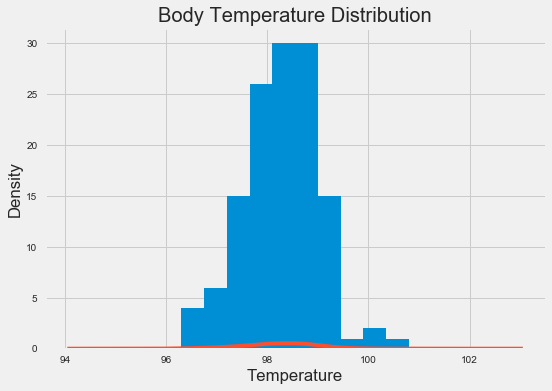

In [55]:
_= temperature.plot(kind='hist', title= 'Body Temperature Distribution')
_= temperature.plot(kind= 'kde')
_= plt.xlabel('Temperature')
plt.show()      

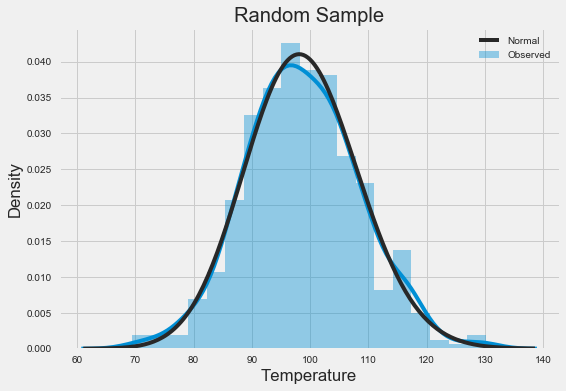

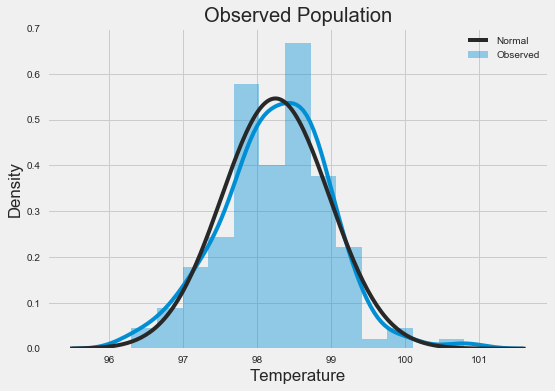

In [78]:
temp = np.random.gamma(98.3108, size=500)
_= sns.distplot(temp, kde=True, fit=stats.gamma)
_= plt.xlabel('Temperature')
_= plt.ylabel('Density')
_= plt.title('Random Sample')
_= plt.legend(('Normal', 'Observed'))
plt.show()


_= sns.distplot(temperature, kde=True, fit=stats.gamma)
_= plt.xlabel('Temperature')
_= plt.ylabel('Density')
_= plt.title('Observed Population')
_= plt.legend(('Normal', 'Observed'))
plt.show()

## Is the sample size large? Are the observations independent?
* From the observations above we can see that the observations are independent and thusly large enough to satisfy our analysis and hypothesis formulations and judgements
* Both the random sample and original sample show similar distributions that are very close to the normal ideal and thusly satisfy the CLT requirement

In [34]:
def ecdf(df):
    
    # Number of data points: n
    n = len(df)

    # x-data for the ECDF: x
    x = np.sort(df)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


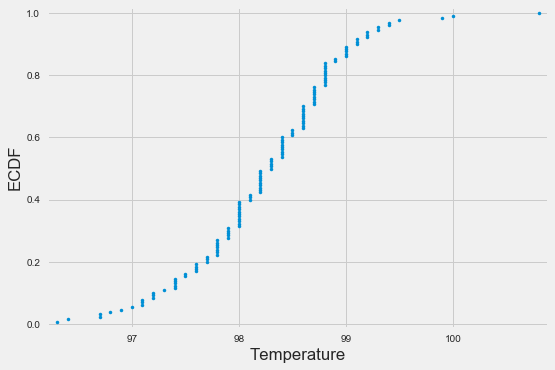

In [35]:
x_vers, y_vers = ecdf(temperature)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Temperature')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

In [44]:
# Variance
print(np.var(temperature))

#Standard deviation
print(np.std(temperature))


0.5334224852071
0.7303577789050377


In [111]:
# T-statistic

t_test= stats.ttest_ind(temperature, sample_temperature)
t_test

Ttest_indResult(statistic=-0.83567939122177892, pvalue=0.40365312012576726)

* Negative T-statistic result indicates that true mean is less than hypothesized mean, which we had observed earlier given that our ideal mean was hypothesized at 98.6 degrees F but we observed 98.25
* The p-value being so great suggest that the data has little correlations and thusly independencies 

In [97]:
# Z-statistic

z_score= stats.zscore(temperature)
z_score

array([ 1.43870478,  0.20643202, -0.61508316,  1.30178559, -0.34124477,
        1.30178559, -0.34124477,  0.7541088 ,  0.20643202,  0.48027041,
        0.7541088 , -2.12119432, -0.06740637,  0.61718961, -0.61508316,
        0.7541088 ,  0.06951282, -0.06740637, -1.43659834,  1.57562398,
        0.06951282, -0.06740637,  0.48027041,  0.20643202, -0.61508316,
       -0.34124477, -0.61508316, -0.06740637,  0.20643202, -0.20432557,
        0.06951282, -0.88892155,  0.34335121,  0.48027041,  1.43870478,
        1.71254318,  1.16486639,  0.06951282, -0.47816396, -2.5319519 ,
        0.20643202,  0.20643202, -1.84735592, -1.43659834,  1.0279472 ,
       -0.47816396, -1.16275994, -1.16275994, -0.47816396, -1.57351753,
        0.891028  ,  0.06951282,  0.34335121,  0.48027041, -0.06740637,
        0.48027041,  0.7541088 , -0.06740637, -0.06740637, -0.88892155,
        1.16486639,  0.20643202, -0.06740637,  0.48027041,  0.61718961,
       -1.16275994, -1.16275994,  0.48027041,  0.61718961,  0.89

*  From the z-score we can observe that the array values show means larger and smaller than observed meaning that all observations are independent

In [125]:
mean, sigma = np.mean(temperature), np.std(temperature)
conf_int_a = stats.norm.interval(0.95, loc=mean, scale=sigma)
conf_int_b = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(temperature)))

conf_int_a
conf_int_b


(98.123682111456645, 98.37477942700491)

* It is observed with 95% confidence that the mean normal temperature would be between 98.12 and 98.37 degrees F of observed population 

# Conclusion

## This data allows us to conclude that the sample size was sufficient enough to draw the conclusion that the average (or mean) temperature of the sample size is slightly less than the ideal of 98.6 which allows us to understand that there is an allowable variance for normal temperature. We can also deduce from the swarmplot distributions and densities that females in this sample have a slightly higher temperature than males. The highest observed outlier was observed in females and lowest observed outlier was observed in men.

## The p value also tells us that the random generated sample and the original sample are independent values. In both the random sample and original sample we can observe a very similar distribution curve which allows us to perceive that the sample is sufficient in size to achieve the necessary observations and deductions. 

## Overall we can safely assume that there is a range associated to normal temperatures as everyone is not the same, in the observation we can see the range as approximately from 97.8 to 98.8 in this sample representative of the population. 